In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataset_LotkaVolterra import *
from sysid_models import *
import yaml
import torch

In [2]:
print("CUDA available:", torch.cuda.is_available())
print("Device count:", torch.cuda.device_count())
for i in range(torch.cuda.device_count()):
    print(f"Device {i} name:", torch.cuda.get_device_name(i))

CUDA available: True
Device count: 2
Device 0 name: NVIDIA RTX A6000
Device 1 name: NVIDIA RTX A6000


In [3]:
# Example parameters and initial conditions
num_samples = 100 # Number of samples to generate
total_time = 20.0
dt = 0.01
seed = 0
config = {'seed': seed,
          'x_init_low': [5, 5], 'x_init_high': [8, 8], 
          'parameters_low': [0.5, 0.1, 0.1, 0.5], 
          'parameters_high': [2.0, 0.5, 0.5, 1.0],
          'data_sparsity': 0.03, 'noise_snr': [15, 15]}

# Generate Data
dataset = LotkaVolterraDataset(num_samples, total_time, dt, config)
# get dataloaders
train_loader , valid_loader, test_loader = get_dataloader_LotkaVolterra(dataset, seed=seed, nfold=0, batch_size=32)

Number of samples: 100
Shape of sample data: torch.Size([60, 2])
The parameters used: tensor([1.1708, 0.2545, 0.3779, 0.8788])
The initial conditions used: tensor([6.1531, 6.0504])


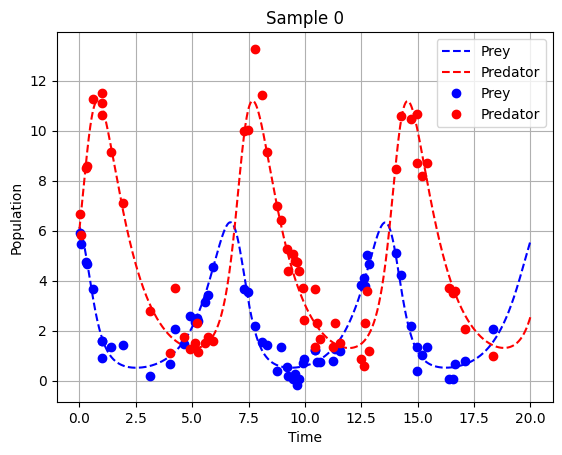

In [8]:
# Get a sample from the train dataset
batch = next(iter(train_loader))  # Preload the first batch to ensure the dataset is ready
sample = {k: v[0] for k, v in batch.items()}

# print the number of samples and the shape of the data
print(f"Number of samples: {len(dataset)}")
print(f"Shape of sample data: {sample['x'].shape}")
print(f"The parameters used: {sample['parameters']}")
print(f"The initial conditions used: {sample['x_init']}")

t_real, x1_real, x2_real = LVmodel(sample['x_init'], total_time, dt, sample['parameters'])

# Visualize one sample
plt.plot(t_real, x1_real, label="Prey", linestyle='--', color='blue')
plt.plot(t_real, x2_real, label="Predator", linestyle='--', color='red')
plt.plot(sample['time'], sample['x'][:, 0], label="Prey", marker='o', linestyle='None', color='blue')
plt.plot(sample['time'], sample['x'][:, 1], label="Predator", marker='o', linestyle='None', color='red')
plt.title("Sample 0")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
path = 'config/diffsysid.yaml'
with open(path, 'r') as file:
    config = yaml.safe_load(file)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = DiffSysId_LV(config, device, target_dim=2).to(device)

output = model(batch)

print(output)

tensor(1.0533, device='cuda:0', grad_fn=<DivBackward0>)
